# Sentiment Analysis --> Prime Video

*   Scraping data from Google Play Store
*   Preprocessing data
    - Data Cleaning
    - Data Transformation
*   Performing Sentiment Analysis using Machine Learning
    - Naive Bayes
    - SVM
*   Making performance evaluation





### Conclusion

*   **SVM** is overall better at classifying negative and positive categories.
*   However, if you want more even results across all classes (including neutral), **Naive Bayes** is a better choice.
*   **SVM** showed higher accuracy and better precision and recall in both categories.


In [23]:
pip install google-play-scraper


Scraping

In [24]:
from google_play_scraper import app, reviews_all
import pandas as pd

result = app('com.amazon.avod.thirdpartyclient')

reviews = reviews_all(
    'com.amazon.avod.thirdpartyclient',
    sleep_milliseconds=0,
    lang='id',
    country='id'
)
df = pd.DataFrame(reviews)
df = df[['content', 'score']]
df.to_csv('prime_video_reviews.csv', index=False)

Preprocessing

In [25]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Cleaning

In [26]:
import pandas as pd
import re

df = pd.read_csv('prime_video_reviews.csv')
df.dropna(subset=['content'], inplace=True)
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

df['cleaned_content'] = df['content'].apply(clean_text)

In [27]:
import nltk
nltk.download('punkt', force=True)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [34]:
def remove_stopwords(text, stopwords_list):

    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords_list]
    return " ".join(filtered_words)
df['cleaned_content_no_stopwords'] = df['cleaned_content'].apply(lambda x: remove_stopwords(x, indonesian_stopwords))


In [35]:
print(df['cleaned_content'].head())
print(df['cleaned_content'].dtypes)

0                                  interesting premium
1                                                ribet
2                                             xnxx com
3    aplikasi parah udah berlangganan tapi login ga...
4                          ok mantap untuk filmfilmnya
Name: cleaned_content, dtype: object
object


Transformation

In [36]:
df['cleaned_content'] = df['cleaned_content'].astype(str)

Text Normalization

In [37]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
indonesian_stopwords = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
def assign_sentiment(score):
    if score <= 2:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:
        return 'positive'
df['sentiment'] = df['score'].apply(assign_sentiment)


Split data

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['cleaned_content_no_stopwords'])
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Naive Bayes

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Evaluasi Model Naive Bayes:")
print(classification_report(y_test, y_pred))

Evaluasi Model Naive Bayes:
              precision    recall  f1-score   support

    negative       0.84      0.88      0.86      1988
     neutral       0.20      0.10      0.14       214
    positive       0.81      0.81      0.81      1317

    accuracy                           0.81      3519
   macro avg       0.62      0.60      0.60      3519
weighted avg       0.79      0.81      0.80      3519



SVM

In [42]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("Evaluasi Model SVM:")
print(classification_report(y_test, y_pred_svm))


Evaluasi Model SVM:
              precision    recall  f1-score   support

    negative       0.85      0.91      0.88      1988
     neutral       0.00      0.00      0.00       214
    positive       0.80      0.86      0.83      1317

    accuracy                           0.83      3519
   macro avg       0.55      0.59      0.57      3519
weighted avg       0.78      0.83      0.81      3519



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


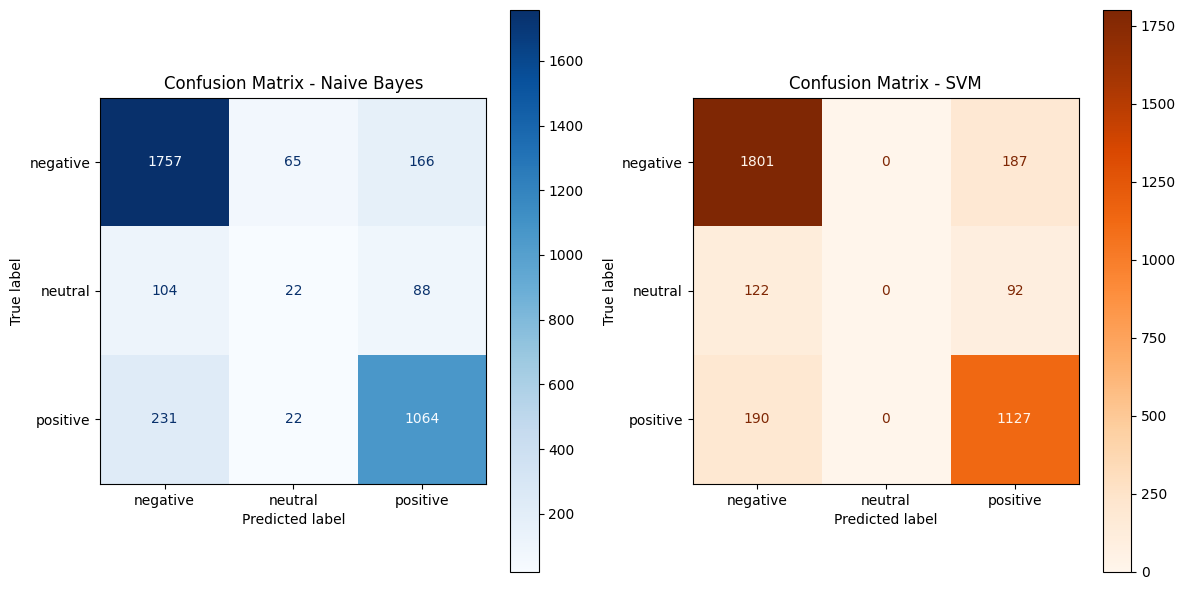

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_nb = confusion_matrix(y_test, y_pred)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=model.classes_)

cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_model.classes_)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

disp_nb.plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Confusion Matrix - Naive Bayes')

disp_svm.plot(ax=axes[1], cmap='Oranges')
axes[1].set_title('Confusion Matrix - SVM')

plt.tight_layout()
plt.show()